In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cellpose import io, models, plot, utils

TRAIN_DIR = "/bigdata/casus/MLID/nips_benchmark/hela_nuc_cellpose/test"


output = io.load_train_test_data(
    TRAIN_DIR,
    image_filter="_img",
    mask_filter="_masks",
    look_one_level_down=False,
)
images, labels, image_names, test_images, test_labels, image_names_test = output

In [2]:
model = models.CellposeModel(
    pretrained_model="/home/wyrzyk93/DeepStain/models/nuc_model_final"
)

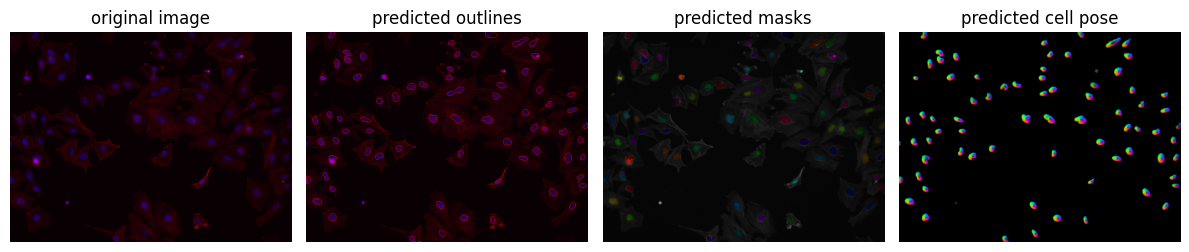

In [3]:
masks_pred, flows, styles = model.eval(images[:2], channels=[1, 3])
idx = 0
mask = labels[idx]
flow = flows[idx][0]

fig = plt.figure(figsize=(12, 5))
plot.show_segmentation(fig, images[idx], mask, flow, channels=[1, 3])
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

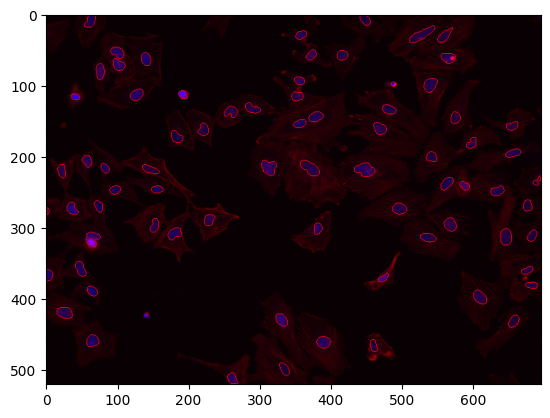

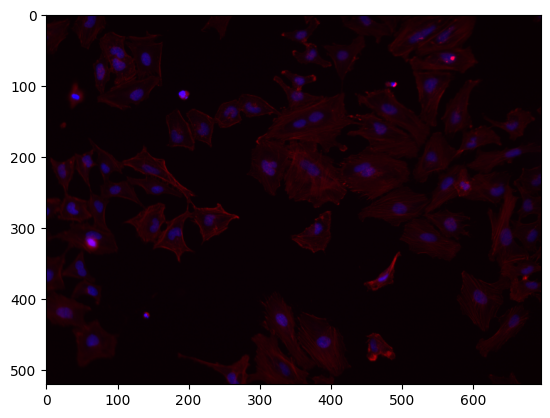

<Figure size 640x480 with 0 Axes>

In [4]:
idx = 0
img = images[idx]
maski = masks_pred[idx]

outlines = utils.masks_to_outlines(maski)
overlay = plot.mask_overlay(img, maski)

outX, outY = np.nonzero(outlines)
imgout = img.copy()
imgout[outX, outY] = np.array([255, 0, 0])

plt.imshow(imgout)
plt.figure()
plt.imshow(img)
plt.figure()

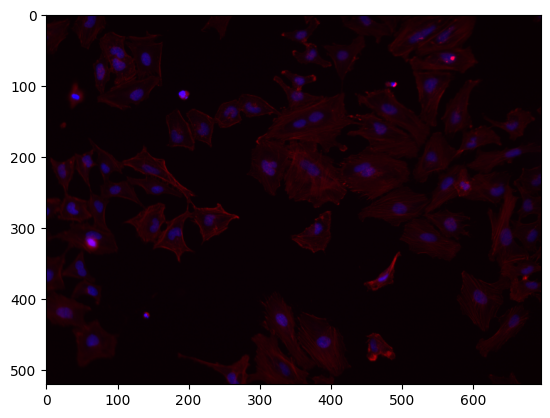

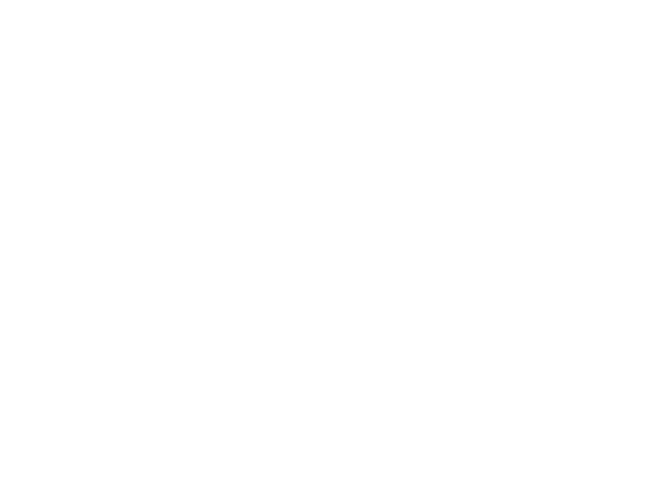

In [5]:
plt.imshow(img)
plt.figure()
plt.axis("off")
plt.gca().set_position([0, 0, 1, 1])
plt.imsave("plots/input_nuc.svg", img)

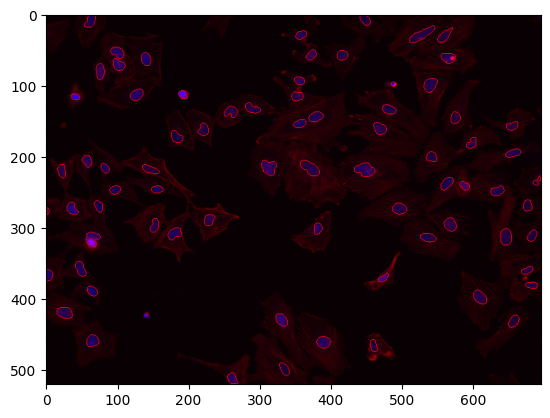

<Figure size 640x480 with 0 Axes>

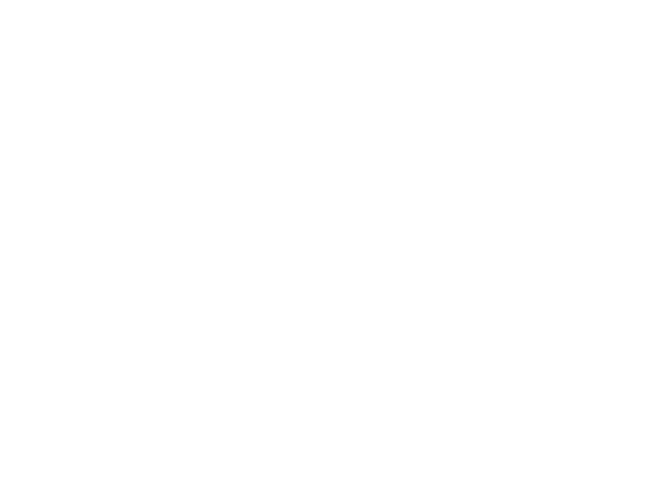

In [6]:
plt.imshow(imgout)
plt.figure()
plt.figure()
plt.axis("off")
plt.gca().set_position([0, 0, 1, 1])
plt.imsave("plots/outlines_nuc.svg", imgout)

In [7]:
random_colors = np.random.randint(0, 256, size=(len(labels[idx] + 10), 3))

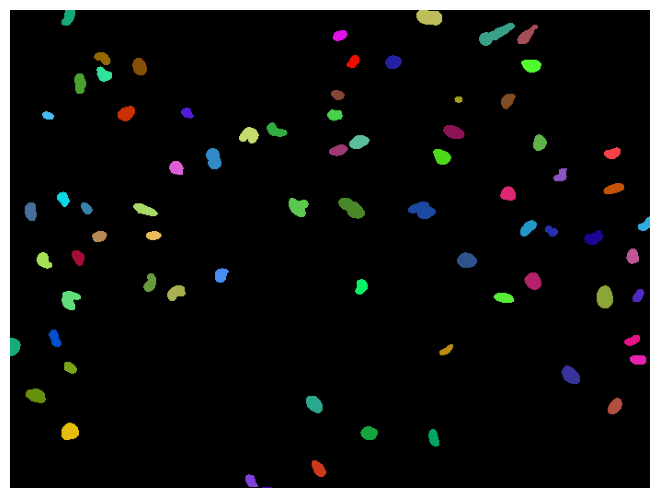

In [8]:
mask_rgb_gt = plot.mask_rgb(labels[idx], random_colors)
mask_rgb_gt[np.all(mask_rgb_gt == [255, 255, 255], axis=-1)] = [0, 0, 0]
plt.imshow(mask_rgb_gt)
plt.axis("off")
plt.gca().set_position([0, 0, 1, 1])
plt.imsave("plots/ground_truth_nuc.svg", mask_rgb_gt)

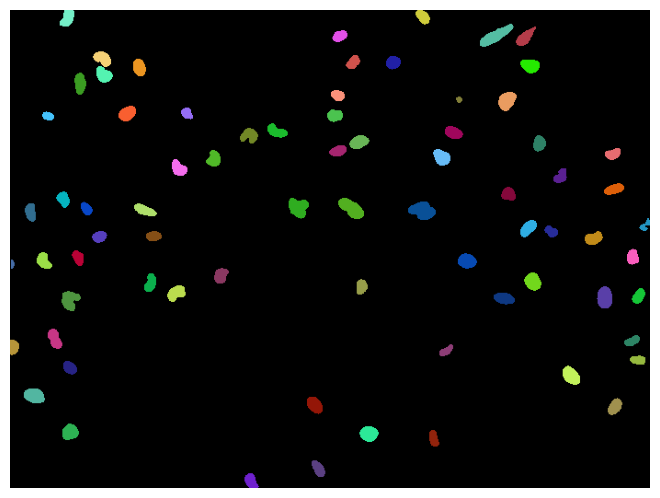

In [9]:
mask_rgb = plot.mask_rgb(maski, random_colors)
mask_rgb[np.all(mask_rgb == [255, 255, 255], axis=-1)] = [0, 0, 0]
plt.imshow(mask_rgb)
plt.axis("off")
plt.gca().set_position([0, 0, 1, 1])
plt.imsave("plots/prediction_nuc.svg", mask_rgb)